# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxide concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centers.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [10]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd

# Loading the data (which is stored in the file 'train.csv')

train = pd.read_csv('train.csv')
train.head()



,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


<IPython.core.display.Javascript object>


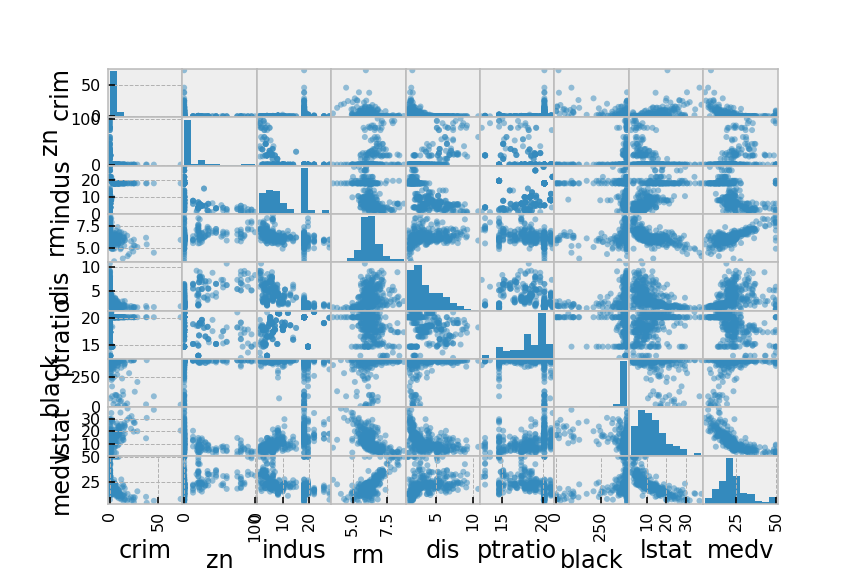

In [36]:
plt.style.use('bmh')
pd.plotting.scatter_matrix(train[['crim','zn','indus','rm','dis','ptratio','black','lstat','medv']]);

In [34]:
# Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables


vars_of_interest = ['crim','indus','black','lstat','medv']
train[vars_of_interest].describe()

,crim,indus,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,11.293483,359.466096,12.515435,22.768769
std,7.352272,6.998123,86.584567,7.067781,9.173468
min,0.006320,0.740000,3.500000,1.730000,5.000000
25%,0.078960,5.130000,376.730000,7.180000,17.400000
50%,0.261690,9.900000,392.050000,10.970000,21.600000
75%,3.678220,18.100000,396.240000,16.420000,25.000000
max,73.534100,27.740000,396.900000,37.970000,50.000000


In [40]:
# Create meaningful subsets of the data using selection operations like .loc, .iloc, or related operations.

# Examples of potential splits:
#   # Create two new DataFrames based on your existing data, 
#     where one contains all the properties next to the Charles river, 
#     and the other one contains properties that aren't

near_chas = train.loc[train['chas']==1]
print("Near Charles:\n",near_chas[vars_of_interest].describe())
away_chas = train.loc[train['chas']==0]
print("\nAway from Charles:\n",away_chas[vars_of_interest].describe())
print("\ndiff:\n",near_chas[vars_of_interest].describe() 
                  - away_chas[vars_of_interest].describe())


Near Charles:
             crim      indus       black      lstat       medv
count  20.000000  20.000000   20.000000  20.000000  20.000000
mean    2.163972  12.330000  380.681000  11.118000  30.175000
std     2.885734   6.505255   21.661541   7.198281  12.362204
min     0.015010   1.210000  321.020000   2.960000  13.400000
25%     0.200377   6.200000  377.565000   5.007500  21.700000
50%     0.572070  12.240000  390.580000   9.735000  26.050000
75%     3.453213  18.100000  395.240000  14.775000  37.900000
max     8.982960  19.580000  396.900000  26.820000  50.000000

Away from Charles:
              crim       indus       black       lstat        medv
count  313.000000  313.000000  313.000000  313.000000  313.000000
mean     3.436787   11.227252  358.110511   12.604728   22.295527
std      7.544289    7.032974   88.984202    7.061663    8.746397
min      0.006320    0.740000    3.500000    1.730000    5.000000
25%      0.078750    4.950000  376.700000    7.220000   17.200000
50%      0

_Explain why you used the chosen subsets and do this for three possible 2-way splits._

_State how you think the two measures of centrality and/or dispersion might be different for each subset of the data._

There are only 20 neighborhoods near the Charles, while there are 313 away from the Charles.

Near the Charles the mean crime rate is lower, mean housing value is higher, and black population higher than away from the Charles.

The standard deviation in crime rate and black population is much lower near the Charles.

The median crime rate is higher near the Charles than away from the Charles (there is at least one high-crime outlier). The median black population is almost the same. Median housing value is higher near the Charles.

While there is little difference in the mean lower-status population in the two subsets, the median lower-status  population is higher away from the Charles.

_State how you think the two measures of centrality and/or dispersion might be different for each subset of the data._

Looking at the difference between low-crime (below the median) and high-crime (above the median) neighborhoods, we see that level of industry and in lower-status population is correlated with high crime, while median housing value is correlated with low crime.

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!